**Lorenzo's Notebook**

Importing useful packages and modules

In [1]:
from data_collection.data_collector_client import DataCollectorClient
from telethon.tl.types import MessageReactions
import asyncio
from decouple import config
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
import re
def reactions_splitting(message):
    pattern = r"emoticon=['\"](.*?)['\"].*?count=(\d+)"
    matches = re.findall(pattern, message)
    if matches:
        return matches
    else:
        return None

In [3]:

# Function to count the number of reactions in a message using the splitted reactions
def count_reactions(splitted_reaction):
    if(splitted_reaction == None):
        return 0
    else:
        tmp = []
        for i in range(len(splitted_reaction)):
            tmp.append(int(splitted_reaction[:][i][1]))
        return sum(tmp)

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Function to preprocess a message removing stopwords of the specified language and special characters
def preprocess_message(message, language):
  message = re.sub(r"@\w+", "", message)
  message = re.sub(r"(\[[^\]]+\]|https?://[^\s]+)", "", message)
  message = re.sub(r"\n", "", message)
  message = re.sub(r"[^\w\s]", "", message)


  # Removing links
 


  # Removing Stopwords
  #stop_words = set(stopwords.words(language))
  #message = " ".join([word for word in message.split() if word not in stop_words])

  # Convert to lowercase
  message = message.lower()

  # Removing empty words
  message = " ".join(message.split())

  return message

# example
messaggi = ["Ciao a tutti!", "Come va?", "Oggi è una bella giornata\n."]
preprocessed_messages = [preprocess_message(message,"italian") for message in messaggi]
print(preprocessed_messages)


['ciao a tutti', 'come va', 'oggi è una bella giornata']


[nltk_data] Downloading package stopwords to C:\Users\asus-
[nltk_data]     zen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df = pd.read_csv('./data/trial.csv')

df['reactions'].fillna('', inplace=True)
df['reactions'] = df['reactions'].apply(lambda x: count_reactions(reactions_splitting(x)))

In [6]:

ourgroup = "https://t.me/+synza2388S80NWM0"
poligroup = "https://t.me/PoliGruppo"

ourdf = df.loc[df['group'] == ourgroup]
ourdf = ourdf.dropna(subset=['text'])

In [7]:
ourdf.shape[0]
ourdf.iloc[-1]
ourdf.iloc[ourdf.shape[0]-1]['sender']

5328388801.0

In [8]:
print(ourdf.iloc[2:4]['text'])

3              Hi😊
4    hey everyone!
Name: text, dtype: object


In [9]:
text = str(ourdf.iloc[2]['text']) + str(ourdf.iloc[3]['text'])

In [10]:
import math
if(not math.isnan(ourdf.iloc[0]['sender'])):
    print(ourdf.iloc[0]['sender'])
else:
    print("This is NAN")

382281069.0


In [11]:
print(text)

Hi😊hey everyone!


In [12]:
ourdf.at[2, 'text'] = text

In [13]:
print(ourdf.iloc[2]['text'])

Hi😊


In [63]:
import math
def merge_consecutive_messages(df):
    ourdf = df.copy()
    k=0
    k = ourdf.shape[0]-1
    i=0
    while i < k-1:

        j=i+1        
        if(not math.isnan(ourdf.iloc[i]['sender'] )):
            x_i = ourdf.iloc[i]['text']
            x_j = ourdf.iloc[j]['text']
            while(ourdf.iloc[i]['sender'] == ourdf.iloc[j]['sender']):
                print("i: ", i, " j: ", j, " k: ", k)
                text = str(ourdf.iloc[i]['text']) + " " + str(ourdf.iloc[j]['text'])
                ourdf.at[i, 'text'] = text
                ourdf.at[i,'reactions'] = ourdf.iloc[j]['reactions'] + ourdf.iloc[i]['reactions']
                
                ourdf.drop(j, inplace=True)
                ourdf.reset_index(drop=True, inplace=True)
                k = k-1
        i=i+1
    return ourdf


In [16]:
trialdf = ourdf[0:10]

In [40]:
trialdf_1 = trialdf.drop(8)
trialdf_1.reset_index(drop=True, inplace=True)
trialdf_1

,Unnamed: 0,group,sender,text,reply,date,reactions
0,327,https://t.me/+synza2388S80NWM0,382281069.0,Hi guys,NaN,2024-02-29 14:34:51+00:00,0
1,326,https://t.me/+synza2388S80NWM0,480675472.0,Hi😊hey everyone!,NaN,2024-02-29 14:39:04+00:00,0
2,325,https://t.me/+synza2388S80NWM0,NaN,Hi😊,NaN,2024-02-29 14:39:24+00:00,0
3,324,https://t.me/+synza2388S80NWM0,NaN,hey everyone!,NaN,2024-02-29 14:41:48+00:00,0
4,323,https://t.me/+synza2388S80NWM0,480675472.0,I don’t know why I see just Amir,NaN,2024-02-29 14:43:15+00:00,0
5,321,https://t.me/+synza2388S80NWM0,NaN,Does anyone know how to change the settings so...,NaN,2024-02-29 14:43:54+00:00,0
6,319,https://t.me/+synza2388S80NWM0,984447467.0,The same is happening to me😂,NaN,2024-02-29 14:44:48+00:00,0
7,318,https://t.me/+synza2388S80NWM0,382281069.0,"It is ok now, the setting was messed up",NaN,2024-02-29 14:45:14+00:00,0
8,317,https://t.me/+synza2388S80NWM0,480675472.0,Now it’s fine,NaN,2024-02-29 14:45:47+00:00,0


In [59]:
ourdf_1 = merge_consecutive_messages(ourdf)

i:  13  j:  14  k:  315
i:  15  j:  16  k:  314
i:  19  j:  20  k:  313
i:  22  j:  23  k:  312
i:  24  j:  25  k:  311
i:  25  j:  26  k:  310
i:  26  j:  27  k:  309
i:  26  j:  27  k:  308
i:  27  j:  28  k:  307
i:  28  j:  29  k:  306
i:  28  j:  29  k:  305
i:  29  j:  30  k:  304
i:  29  j:  30  k:  303
i:  36  j:  37  k:  302
i:  36  j:  37  k:  301
i:  39  j:  40  k:  300
i:  39  j:  40  k:  299
i:  43  j:  44  k:  298
i:  49  j:  50  k:  297
i:  51  j:  52  k:  296
i:  51  j:  52  k:  295
i:  55  j:  56  k:  294
i:  56  j:  57  k:  293
i:  56  j:  57  k:  292
i:  61  j:  62  k:  291
i:  63  j:  64  k:  290
i:  77  j:  78  k:  289
i:  77  j:  78  k:  288
i:  77  j:  78  k:  287
i:  78  j:  79  k:  286
i:  78  j:  79  k:  285
i:  89  j:  90  k:  284
i:  95  j:  96  k:  283
i:  96  j:  97  k:  282
i:  97  j:  98  k:  281
i:  101  j:  102  k:  280
i:  102  j:  103  k:  279
i:  102  j:  103  k:  278
i:  103  j:  104  k:  277
i:  103  j:  104  k:  276
i:  106  j:  107  k:  275
i:  

**Laser Embedding**

In [60]:
ourdf[20:30]

,Unnamed: 0,group,sender,text,reply,date,reactions
22,306,https://t.me/+synza2388S80NWM0,9.844475e+08,But I think that also depends on the amount of...,NaN,2024-02-29 14:54:43+00:00,0
23,305,https://t.me/+synza2388S80NWM0,3.822811e+08,"Ow, we should setup a meeting then:)",22.0,2024-02-29 14:54:50+00:00,0
24,304,https://t.me/+synza2388S80NWM0,3.822811e+08,I will send the email now,24.0,2024-02-29 14:57:06+00:00,0
25,303,https://t.me/+synza2388S80NWM0,5.328389e+09,"""Dear MDP team,\n\nThank you for your message....",NaN,2024-03-01 08:33:36+00:00,0
26,302,https://t.me/+synza2388S80NWM0,9.844475e+08,I have a doctor appointment that I cannot miss...,NaN,2024-03-01 08:38:29+00:00,0
27,301,https://t.me/+synza2388S80NWM0,5.328389e+09,"No worries, that's the whole point of these em...",NaN,2024-03-01 08:46:57+00:00,0
28,300,https://t.me/+synza2388S80NWM0,5.328389e+09,@AmirMosio @LorenzoMondo do you guys have a ti...,NaN,2024-03-01 08:47:58+00:00,0
29,299,https://t.me/+synza2388S80NWM0,3.822811e+08,"No, I'm probably ok.",29.0,2024-03-01 08:53:18+00:00,0
30,298,https://t.me/+synza2388S80NWM0,4.806755e+08,For me only on 5 afternoon it’s not good,NaN,2024-03-01 08:53:49+00:00,0
31,297,https://t.me/+synza2388S80NWM0,4.806755e+08,5 March,NaN,2024-03-01 08:54:10+00:00,0


In [61]:
ourdf_1[20:30]

,Unnamed: 0,group,sender,text,reply,date,reactions
20,303,https://t.me/+synza2388S80NWM0,5.328389e+09,"""Dear MDP team,\n\nThank you for your message....",NaN,2024-03-01 08:33:36+00:00,0
21,302,https://t.me/+synza2388S80NWM0,9.844475e+08,I have a doctor appointment that I cannot miss...,NaN,2024-03-01 08:38:29+00:00,0
22,301,https://t.me/+synza2388S80NWM0,5.328389e+09,"No worries, that's the whole point of these em...",NaN,2024-03-01 08:46:57+00:00,0
23,299,https://t.me/+synza2388S80NWM0,3.822811e+08,"No, I'm probably ok.",29.0,2024-03-01 08:53:18+00:00,0
24,298,https://t.me/+synza2388S80NWM0,4.806755e+08,For me only on 5 afternoon it’s not good5 March,NaN,2024-03-01 08:53:49+00:00,0
25,296,https://t.me/+synza2388S80NWM0,3.822811e+08,"Ok, I'll ask for another time.What do we do?",NaN,2024-03-01 08:55:48+00:00,0
26,292,https://t.me/+synza2388S80NWM0,9.844475e+08,"I am still not available, as I said in the pre...",NaN,2024-03-01 10:01:20+00:00,0
27,289,https://t.me/+synza2388S80NWM0,5.328389e+09,the email looks goodI think we weren't Cc'd in...,38.0,2024-03-01 10:11:13+00:00,0
28,287,https://t.me/+synza2388S80NWM0,3.822811e+08,"Yeah, my badShould i send the email?I don't t...",41.0,2024-03-01 10:12:30+00:00,0
29,284,https://t.me/+synza2388S80NWM0,9.844475e+08,If you want that's ok for me. You should proba...,43.0,2024-03-01 10:14:51+00:00,0


In [260]:
texts = ourdf['text']
texts = [str(text) for text in texts]
texts = [text for text in texts if text != "nan"]
preprocessed_texts = [preprocess_message(str(text), "english") for text in texts]
preprocessed_texts = [text for text in preprocessed_texts if text != ""]
print("-----NORMAL TEXTS-----")
print(texts[0:5])
print("\n-----PREPROCESSED TEXTS-----")
print(preprocessed_texts[0:5])

print(len(preprocessed_texts))
print(len(texts))


-----NORMAL TEXTS-----
['Hi guys', 'Hi', 'Hi😊', 'hey everyone!', 'I don’t know why I see just Amir']

-----PREPROCESSED TEXTS-----
['hi guys', 'hi', 'hi', 'hey everyone', 'i dont know why i see just amir']
304
316


In [261]:
langs = ["en" for i in range(len(texts))]

from laserembeddings import Laser

laser = Laser()

# if all sentences are in the same language:

embeddings = laser.embed_sentences(
    texts,
    lang=langs)

embeddings.shape

(316, 1024)

In [262]:
def plot_reduced_embeddings_2D(texts, lang):
    langs = [lang for i in range(len(texts))]

    from laserembeddings import Laser

    laser = Laser()

    # if all sentences are in the same language:

    embeddings = laser.embed_sentences(
    texts,
    lang=langs)

    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    # Plottare i punti
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])

    for i, point in enumerate(reduced_embeddings):
        # Annotate each point with the message number
        plt.annotate(str(i + 1), point, ha='center', va='center')

    plt.show()

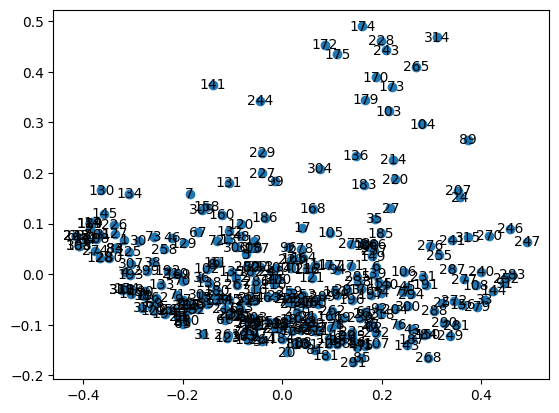

In [263]:
plot_reduced_embeddings_2D(texts, "en")

Now we use the messages of the polinetwork group 

We'll plot the data as we have done before to see if there is any change in the distribution of the messages of two different groups

In [264]:
polidf = df.loc[df['group'] == poligroup]

polidf.head()

,Unnamed: 0,group,sender,text,reply,date,reactions
329,999,https://t.me/PoliGruppo,1.377961e+09,ma ce una sezione si o no?,NaN,2024-03-03 10:24:58+00:00,0
330,998,https://t.me/PoliGruppo,1.265578e+09,Se é per l'Erasmus o per mobilità internaziona...,204165.0,2024-03-03 10:32:32+00:00,0
331,997,https://t.me/PoliGruppo,4.690109e+08,Ci sono delle restrizioni a cosa si può portar...,NaN,2024-03-03 10:34:09+00:00,0
332,996,https://t.me/PoliGruppo,4.282712e+08,Cerca su libgen,204159.0,2024-03-03 10:41:34+00:00,0
333,995,https://t.me/PoliGruppo,6.277756e+08,Da regolamento c'è scritto che sono tassativam...,204167.0,2024-03-03 11:03:14+00:00,0


In [265]:
def plot_and_compare_reduced_embeddings_2D(texts1, texts2, lang1, lang2):
    langs1 = [lang1 for i in range(100)]
    langs2 = [lang2 for i in range(100)]

    from laserembeddings import Laser

    laser = Laser()
#
    # if all sentences are in the same language:

    embeddings1 = laser.embed_sentences(
    texts1[0:100],
    lang=langs1)

    embeddings2 = laser.embed_sentences(
    texts2[0:100],
    lang=langs2)

    pca = PCA(n_components=2)
    reduced_embeddings1 = pca.fit_transform(embeddings1)
    pca = PCA(n_components=2)
    reduced_embeddings2 = pca.fit_transform(embeddings2)

    # Plottare i punti
    plt.scatter(reduced_embeddings1[:, 0], reduced_embeddings1[:, 1], c='b')
    plt.scatter(reduced_embeddings2[:, 0], reduced_embeddings2[:, 1], c='r')

    plt.show()

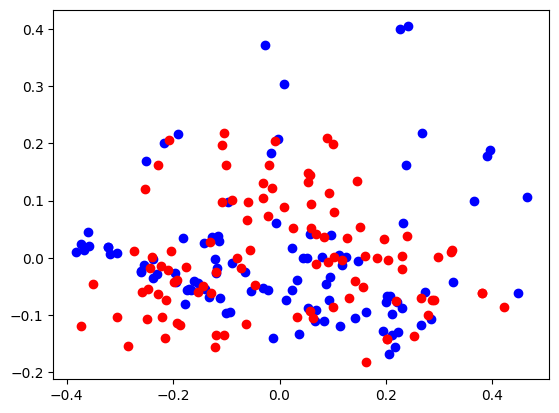

In [266]:
plot_and_compare_reduced_embeddings_2D(texts, polidf['text'], "en", "it")

In [267]:
poli_texts = polidf['text']
poli_texts_strings = [str(text) for text in poli_texts if isinstance(text, str)] 
print(poli_texts_strings[0:5])



['ma ce una sezione si o no?', "Se é per l'Erasmus o per mobilità internazionale c'é l'apposito gruppo", 'Ci sono delle restrizioni a cosa si può portare alla laurea per quanto riguarda coriandoli, botti ecc?', 'Cerca su libgen', "Da regolamento c'è scritto che sono tassativamente vietati i festeggiamenti all'interno del campus. Mi pareva di aver scritto da qualche altra parte di evitare di lasciare sporcizia in giro cordiandoli compresi"]


Try by plotting in the space

In [268]:
def plot_and_compare_reduced_embeddings_3D(texts1, texts2, lang1, lang2, name1, name2):
    langs1 = [lang1 for i in range(100)]
    langs2 = [lang2 for i in range(100)]

    from laserembeddings import Laser

    laser = Laser()

    # if all sentences are in the same language:

    embeddings1 = laser.embed_sentences(
    texts1[0:100],
    lang=langs1)

    embeddings2 = laser.embed_sentences(
    texts2[0:100],
    lang=langs2)

    pca = PCA(n_components=3)
    reduced_embeddings1 = pca.fit_transform(embeddings1)
    pca = PCA(n_components=3)
    reduced_embeddings2 = pca.fit_transform(embeddings2)

    import plotly.graph_objects as go

    # Importare i dati
    import numpy as np

    # Creare la figura
    fig = go.Figure()

    # Plot each set of points with a unique colormap
    fig.add_scatter3d(
        x=reduced_embeddings1[:, 0],
        y=reduced_embeddings1[:, 1],
        z=reduced_embeddings1[:, 2],
        mode='markers',
        marker=dict(color='blue', size=8),  # Use a color name or hex code for direct coloring
        name=name1
    )

    fig.add_scatter3d(
        x=reduced_embeddings2[:, 0],
        y=reduced_embeddings2[:, 1],
        z=reduced_embeddings2[:, 2],
        mode='markers',
        marker=dict(color='red', size=8),  # Use a different color for this set
        name=name2
    )

    # Aggiungere le legende
    fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

    # Mostrare il plot
    fig.show()

In [269]:
plot_and_compare_reduced_embeddings_3D(texts, poli_texts_strings, "en", "it", "Our Group", "PoliNetwork Group")

Doing the same as before using the preprocessed texts

In [270]:
#preprocessed_texts = [preprocess_message(text, "english") for text in texts]
poli_preprocessed_texts = [preprocess_message(text, "italian") for text in poli_texts_strings]


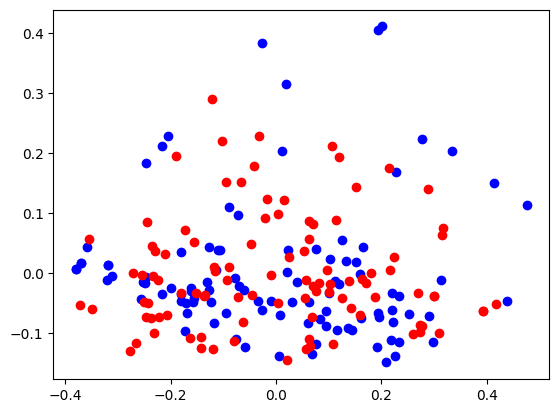

In [271]:
plot_and_compare_reduced_embeddings_2D(preprocessed_texts, poli_preprocessed_texts, "en", "it")

In [272]:
plot_and_compare_reduced_embeddings_3D(preprocessed_texts, poli_preprocessed_texts, "en", "it", "Our Group", "PoliNetwork Group")

**Cosine Similarity**

In [273]:

# Define your two sentences
sentence1 = "This is the first sentence."
sentence2 = "This sentence is very similar to the first one."

# Get the LASER embeddings for the sentences
embedding1 = laser.embed_sentences(
  sentence1,
  lang='en')

embedding2 = laser.embed_sentences(
  sentence2,
  lang='en')

embedding3 = laser.embed_sentences(
  sentence1,
  lang='en')

# Calculate cosine similarity
import numpy as np
similarity1 = np.dot(embedding1[0], embedding2[0]) / (np.linalg.norm(embedding1[0]) * np.linalg.norm(embedding2[0]))

# Print the similarity score
print(f"Cosine similarity between sentences: {similarity1:.4f}")

# Calculate cosine similarity OF THE SAME SENTENCE
similarity2 = np.dot(embedding1[0], embedding3[0]) / (np.linalg.norm(embedding1[0]) * np.linalg.norm(embedding3[0]))
print(f"Cosine similarity between two equal sentences: {similarity2:.4f}")



Cosine similarity between sentences: 0.7246
Cosine similarity between two equal sentences: 1.0000


In [274]:
range_ = np.arange(5)
print(range_)

[0 1 2 3 4]


In [275]:
#Return the average cosine similarity between the last k embeddings
def average_k_cosine_similarity(embeddings, k):
    tmp_similarity = []
    for i in np.arange(k):
        if i != k-1:
            tmp_similarity.append(np.dot(embeddings[k-1], embeddings[i]) / (np.linalg.norm(embeddings[k-1]) * np.linalg.norm(embeddings[i])))
    return np.mean(tmp_similarity)

print(len(embeddings))

similarities = average_k_cosine_similarity(embeddings, 5)

316


In [276]:
def cosine_similarities_last_k_sliding_window (embeddings2, k):
    trial_similarities = list()
    for i in np.arange(len(embeddings2)-k):
        if i+2 > k:
            window = [emb for emb in embeddings2[i:i+k]]
            trial_similarities.append(average_k_cosine_similarity(window, k))
            #329 print(i)
        else:
            window = [emb for emb in embeddings2[0:i+2]]
            lenw = len(window)
            lent = len(trial_similarities)
            trial_similarities.append(average_k_cosine_similarity(window, i+2))
    return trial_similarities

In [277]:
print(preprocessed_texts[0:5])
prep_text = preprocessed_texts

['hi guys', 'hi', 'hi', 'hey everyone', 'i dont know why i see just amir']


In [278]:
laser = Laser()
langs = ['en' for i in range(len(preprocessed_texts))]
embeddings2 = laser.embed_sentences(
  prep_text,
  lang=langs)

In [279]:
len(embeddings2[0:8])

8

0.7389633
296
304


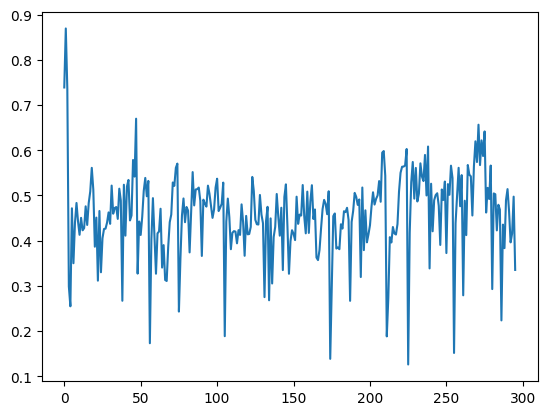

In [280]:
k = 8
our_group_similarities = cosine_similarities_last_k_sliding_window(embeddings2, k)

print(our_group_similarities[0])

print(len(our_group_similarities))
print(len(embeddings2))

# Plot the list
plt.plot(our_group_similarities)
plt.show()



In [282]:
def watch_messages_in_a_range(messages, start, end, k):
    for i in np.arange(start, end):
        print(str(i) +" : " + messages[i+k])
print(texts[0:5])
#printing indices where the average cosine similarity of the previous k message is below 0.30
indices = [i for i, num in enumerate(our_group_similarities) if num < 0.30]
#minindex = min(enumerate(our_group_similarities.min()))
minimum = [i for i, num in enumerate(our_group_similarities) if num == min(our_group_similarities)]
print(minimum)
print(indices)
watch_messages_in_a_range(preprocessed_texts,50, 60, k)

['Hi guys', 'Hi', 'Hi😊', 'hey everyone!', 'I don’t know why I see just Amir']
[225]
[3, 4, 38, 56, 75, 105, 131, 134, 174, 175, 187, 211, 212, 225, 255, 261, 280, 286]
50 : do i simply say until 1130
51 : yes maybe specify that in the morning is ok i dont really know
52 : apologies if the email was unclear well all be available on monday morning until 1130
53 : i did not get any response from that could someone else try to setup a meeting or remind her of the appointment
54 : lets wait and if she didnt respond by the end of monday well remind her
55 : ok
56 : has anyone replied yet
57 : has someone replied to confirm
58 : yes amir did it
59 : ok


In [60]:
laser = Laser()
langs = ['it' for i in range(len(poli_preprocessed_texts))]
prep_poli_embeddings = laser.embed_sentences(
  poli_preprocessed_texts,
  lang=langs)

KeyboardInterrupt: 

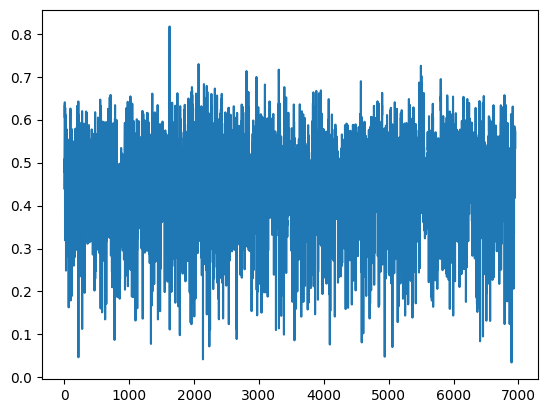

In [ ]:
poli_similarities = cosine_similarities_last_k_sliding_window(prep_poli_embeddings, 6)
#printing indices where the average similarity of the last k message is below 0.30
# Plot the list
plt.plot(poli_similarities)
plt.show()

In [ ]:
indices = [i for i, num in enumerate(poli_similarities) if num < 0.30]
print(indices)
watch_messages_in_a_range(poli_texts_strings, 20,35)

[27, 61, 68, 98, 110, 119, 147, 157, 159, 179, 218, 228, 235, 241, 251, 267, 276, 295, 310, 314, 315, 440, 456, 464, 466, 477, 483, 486, 509, 511, 544, 560, 569, 583, 600, 630, 633, 646, 648, 719, 735, 739, 755, 769, 775, 795, 809, 812, 819, 826, 841, 843, 850, 854, 860, 901, 920, 935, 936, 943, 957, 963, 981, 1003, 1021, 1035, 1042, 1060, 1071, 1098, 1108, 1109, 1111, 1122, 1125, 1209, 1243, 1276, 1317, 1319, 1327, 1336, 1350, 1359, 1386, 1398, 1407, 1444, 1460, 1469, 1477, 1483, 1548, 1572, 1579, 1589, 1592, 1607, 1625, 1626, 1652, 1665, 1685, 1702, 1712, 1715, 1726, 1738, 1758, 1765, 1781, 1795, 1822, 1824, 1833, 1868, 1881, 1907, 1933, 1948, 1949, 1960, 1961, 1973, 1975, 1987, 1992, 1994, 2004, 2007, 2022, 2025, 2027, 2054, 2117, 2120, 2138, 2159, 2185, 2197, 2199, 2209, 2219, 2236, 2238, 2247, 2249, 2278, 2296, 2297, 2303, 2308, 2309, 2334, 2351, 2354, 2356, 2357, 2375, 2383, 2396, 2434, 2448, 2462, 2477, 2497, 2536, 2542, 2553, 2585, 2623, 2651, 2657, 2713, 2729, 2736, 2755, 2780

TypeError: watch_messages_in_a_range() missing 1 required positional argument: 'k'